## I. Intro

Данные собраны из сайта krisha.kz, с фильтром по городу Астана.
built_type - тип строения
year_built - год постройки
flour - этаж
area - площадь
condition - состояние
bathrooms - сан. узлы
balcony - балконы
exchange - возможность обменять
furniture - мебель
security - охрана, домофон и т.д
ceil - высота потолков
parking - паркинг
residance - жилой комплекс
phone - проводной телефон
floor - тип пола
door - тип двери
balcony_glass - стеклянный балкон
ex_dormetory - бывш. общежитие
inernet - интернет
id - уникальный номер
userType - тип пользователя
rooms - количество комнат
lat - широта
lon - долгота
district - район
street - улица
house_num - номер квартиры
price - цена


## II. Data Import

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [191]:
df = pd.read_csv('../data/krisha.csv')
df.head()

,built_type,year_built,flour,area,condition,bathrooms,balcony,exchange,furniture,security,...,inernet,id,userType,rooms,lat,lon,district,street,house_num,price
0,монолитный,2016,4 из 9,99.0,хорошее,2 с/у и более,несколько балконов или лоджий,NaN,частично,"домофон, видеонаблюдение",...,оптика,674641098,owner,3,51.134068,71.367502,Esilyskiy_r-n,Ilyyasa_Omarova,NaN,40000000
1,кирпичный,2012,4 из 6,45.8,хорошее,совмещенный,балкон,NaN,частично,"домофон, видеонаблюдение",...,оптика,676011227,owner,1,51.123006,71.503660,Almaty_r-n,Temirbeka_Zhurgenova,27,19000000
2,кирпичный,2021,2 из 10,90.0,NaN,NaN,NaN,NaN,NaN,"охрана, видеонаблюдение",...,NaN,681148481,specialist,3,51.101005,71.401826,Esilyskiy_r-n,Uly_Dala,NaN,53999999
3,кирпичный,2021,2 из 8,62.0,среднее,NaN,NaN,Не интересует,NaN,NaN,...,NaN,681724680,owner,2,51.172030,71.394117,Saryarka_r-n,Zhambyl,10,31000000
4,NaN,2005,7 из 12,36.2,хорошее,совмещенный,балкон,Не интересует,NaN,"домофон, сигнализация, видеонаблюдение",...,NaN,681619392,owner,1,51.153648,71.500749,Almaty_r-n,Musrepova,7,17500000


## III. Data cleaning

In [192]:
from utils.preparation import *

### Перевод строк в числовые значения

In [193]:
df['max_flours'] = df['flour'].apply(get_max_floor).astype('Int64')
df['flour'] = df['flour'].apply(get_current_floor).astype('Int64')
df['ceil'] = df['ceil'].str.replace(' м', '').astype('Float64')
df

,built_type,year_built,flour,area,condition,bathrooms,balcony,exchange,furniture,security,...,id,userType,rooms,lat,lon,district,street,house_num,price,max_flours
0,монолитный,2016,4,99.0,хорошее,2 с/у и более,несколько балконов или лоджий,NaN,частично,"домофон, видеонаблюдение",...,674641098,owner,3,51.134068,71.367502,Esilyskiy_r-n,Ilyyasa_Omarova,NaN,40000000,9
1,кирпичный,2012,4,45.8,хорошее,совмещенный,балкон,NaN,частично,"домофон, видеонаблюдение",...,676011227,owner,1,51.123006,71.503660,Almaty_r-n,Temirbeka_Zhurgenova,27,19000000,6
2,кирпичный,2021,2,90.0,NaN,NaN,NaN,NaN,NaN,"охрана, видеонаблюдение",...,681148481,specialist,3,51.101005,71.401826,Esilyskiy_r-n,Uly_Dala,NaN,53999999,10
3,кирпичный,2021,2,62.0,среднее,NaN,NaN,Не интересует,NaN,NaN,...,681724680,owner,2,51.172030,71.394117,Saryarka_r-n,Zhambyl,10,31000000,8
4,NaN,2005,7,36.2,хорошее,совмещенный,балкон,Не интересует,NaN,"домофон, сигнализация, видеонаблюдение",...,681619392,owner,1,51.153648,71.500749,Almaty_r-n,Musrepova,7,17500000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5781,кирпичный,2021,12,40.0,NaN,NaN,NaN,Не интересует,NaN,NaN,...,679139665,specialist,2,51.132520,71.378390,Esilyskiy_r-n,E-753,3,21299000,16
5782,NaN,2014,8,39.0,NaN,NaN,NaN,Не интересует,NaN,NaN,...,681784419,owner,1,51.158612,71.502708,Almaty_r-n,Kudayberdiuly,23,18500000,9
5783,монолитный,2021,10,100.0,хорошее,NaN,NaN,Не интересует,NaN,NaN,...,680610156,specialist,4,51.126986,71.395395,Esilyskiy_r-n,Tole_bi,NaN,62000000,12
5784,NaN,2017,8,60.0,хорошее,раздельный,лоджия,NaN,NaN,NaN,...,681669989,specialist,2,51.125056,71.359905,Esilyskiy_r-n,Zh_Moldagalieva,2,23000000,9


### Перевод строк в булеан

In [194]:
df['balcony_glass'] = df['balcony_glass'].str.contains('да').astype('bool')
df['ex_dormetory'] = df['ex_dormetory'].str.contains('да').astype('bool')
df

,built_type,year_built,flour,area,condition,bathrooms,balcony,exchange,furniture,security,...,id,userType,rooms,lat,lon,district,street,house_num,price,max_flours
0,монолитный,2016,4,99.0,хорошее,2 с/у и более,несколько балконов или лоджий,NaN,частично,"домофон, видеонаблюдение",...,674641098,owner,3,51.134068,71.367502,Esilyskiy_r-n,Ilyyasa_Omarova,NaN,40000000,9
1,кирпичный,2012,4,45.8,хорошее,совмещенный,балкон,NaN,частично,"домофон, видеонаблюдение",...,676011227,owner,1,51.123006,71.503660,Almaty_r-n,Temirbeka_Zhurgenova,27,19000000,6
2,кирпичный,2021,2,90.0,NaN,NaN,NaN,NaN,NaN,"охрана, видеонаблюдение",...,681148481,specialist,3,51.101005,71.401826,Esilyskiy_r-n,Uly_Dala,NaN,53999999,10
3,кирпичный,2021,2,62.0,среднее,NaN,NaN,Не интересует,NaN,NaN,...,681724680,owner,2,51.172030,71.394117,Saryarka_r-n,Zhambyl,10,31000000,8
4,NaN,2005,7,36.2,хорошее,совмещенный,балкон,Не интересует,NaN,"домофон, сигнализация, видеонаблюдение",...,681619392,owner,1,51.153648,71.500749,Almaty_r-n,Musrepova,7,17500000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5781,кирпичный,2021,12,40.0,NaN,NaN,NaN,Не интересует,NaN,NaN,...,679139665,specialist,2,51.132520,71.378390,Esilyskiy_r-n,E-753,3,21299000,16
5782,NaN,2014,8,39.0,NaN,NaN,NaN,Не интересует,NaN,NaN,...,681784419,owner,1,51.158612,71.502708,Almaty_r-n,Kudayberdiuly,23,18500000,9
5783,монолитный,2021,10,100.0,хорошее,NaN,NaN,Не интересует,NaN,NaN,...,680610156,specialist,4,51.126986,71.395395,Esilyskiy_r-n,Tole_bi,NaN,62000000,12
5784,NaN,2017,8,60.0,хорошее,раздельный,лоджия,NaN,NaN,NaN,...,681669989,specialist,2,51.125056,71.359905,Esilyskiy_r-n,Zh_Moldagalieva,2,23000000,9


### One Hot Encoding типов охраны

In [195]:
get_security_types(df.security)

['домофон',
 'видеонаблюдение',
 'охрана',
 'сигнализация',
 'кодовый замок',
 'видеодомофон',
 'консьерж',
 'решетки на окнах']

In [196]:
security_names = {
    'has_intercom': 'домофон',
    'has_video_control': 'видеонаблюдение',
    'has_guard': 'охрана',
    'has_alarm': 'сигнализация',
    'has_video_intercom': 'видеодомофон',
    'has_concierge': 'консьерж',
    'has_bars': 'решетки на окнах',
}

In [197]:
for field_name, token in security_names.items():
    df[field_name] = df['security'].str.contains(token).astype('bool')
df = df.drop('security', axis=1)
df

,built_type,year_built,flour,area,condition,bathrooms,balcony,exchange,furniture,ceil,...,house_num,price,max_flours,has_intercom,has_video_control,has_guard,has_alarm,has_video_intercom,has_concierge,has_bars
0,монолитный,2016,4,99.0,хорошее,2 с/у и более,несколько балконов или лоджий,NaN,частично,2.7,...,NaN,40000000,9,True,True,False,False,False,False,False
1,кирпичный,2012,4,45.8,хорошее,совмещенный,балкон,NaN,частично,2.5,...,27,19000000,6,True,True,False,False,False,False,False
2,кирпичный,2021,2,90.0,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,53999999,10,False,True,True,False,False,False,False
3,кирпичный,2021,2,62.0,среднее,NaN,NaN,Не интересует,NaN,2.7,...,10,31000000,8,True,True,True,True,True,True,True
4,NaN,2005,7,36.2,хорошее,совмещенный,балкон,Не интересует,NaN,<NA>,...,7,17500000,12,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5781,кирпичный,2021,12,40.0,NaN,NaN,NaN,Не интересует,NaN,3.0,...,3,21299000,16,True,True,True,True,True,True,True
5782,NaN,2014,8,39.0,NaN,NaN,NaN,Не интересует,NaN,<NA>,...,23,18500000,9,True,True,True,True,True,True,True
5783,монолитный,2021,10,100.0,хорошее,NaN,NaN,Не интересует,NaN,3.0,...,NaN,62000000,12,True,True,True,True,True,True,True
5784,NaN,2017,8,60.0,хорошее,раздельный,лоджия,NaN,NaN,2.7,...,2,23000000,9,True,True,True,True,True,True,True


### Убрать лишние колонки

In [198]:
df = df.drop('id', axis=1)
df = df.drop('lat', axis=1)
df = df.drop('lon', axis=1)

## IV. Data describe

### Описание числовых значений

In [199]:
df.describe()

,year_built,flour,area,ceil,rooms,price,max_flours
count,5786.000000,5637.0,5786.000000,5015.0,5786.000000,5.786000e+03,5525.0
mean,2013.235050,6.631009,69.837857,2.86008,2.131697,3.779132e+07,11.167964
std,11.834353,4.538036,45.288339,0.726752,1.059643,4.132900e+07,5.434391
min,1918.000000,1.0,11.000000,2.0,1.000000,4.000000e+06,2.0
25%,2010.000000,3.0,42.000000,2.7,1.000000,2.000000e+07,9.0
50%,2017.000000,6.0,59.000000,2.8,2.000000,2.700000e+07,10.0
75%,2021.000000,9.0,82.000000,3.0,3.000000,4.000000e+07,13.0
max,2022.000000,65.0,800.000000,28.0,11.000000,7.300000e+08,113.0


## V. Data preparation

### Цена за кв.м

In [200]:
df['sqr_price'] = np.floor(df['price'] / df['area']).astype('Int64')
df

,built_type,year_built,flour,area,condition,bathrooms,balcony,exchange,furniture,ceil,...,price,max_flours,has_intercom,has_video_control,has_guard,has_alarm,has_video_intercom,has_concierge,has_bars,sqr_price
0,монолитный,2016,4,99.0,хорошее,2 с/у и более,несколько балконов или лоджий,NaN,частично,2.7,...,40000000,9,True,True,False,False,False,False,False,404040
1,кирпичный,2012,4,45.8,хорошее,совмещенный,балкон,NaN,частично,2.5,...,19000000,6,True,True,False,False,False,False,False,414847
2,кирпичный,2021,2,90.0,NaN,NaN,NaN,NaN,NaN,3.0,...,53999999,10,False,True,True,False,False,False,False,599999
3,кирпичный,2021,2,62.0,среднее,NaN,NaN,Не интересует,NaN,2.7,...,31000000,8,True,True,True,True,True,True,True,500000
4,NaN,2005,7,36.2,хорошее,совмещенный,балкон,Не интересует,NaN,<NA>,...,17500000,12,True,True,False,True,False,False,False,483425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5781,кирпичный,2021,12,40.0,NaN,NaN,NaN,Не интересует,NaN,3.0,...,21299000,16,True,True,True,True,True,True,True,532475
5782,NaN,2014,8,39.0,NaN,NaN,NaN,Не интересует,NaN,<NA>,...,18500000,9,True,True,True,True,True,True,True,474358
5783,монолитный,2021,10,100.0,хорошее,NaN,NaN,Не интересует,NaN,3.0,...,62000000,12,True,True,True,True,True,True,True,620000
5784,NaN,2017,8,60.0,хорошее,раздельный,лоджия,NaN,NaN,2.7,...,23000000,9,True,True,True,True,True,True,True,383333


## VI. Hypothesis

### Рост средней цены за кв.м в зависимости от года постройки

In [201]:
mean_price_by_year = df['sqr_price'].groupby(df['year_built']).mean()
X,Y = mean_price_by_year.keys(), mean_price_by_year.values


In [206]:
linear_regressor = LinearRegression()
linear_regressor.fit(np.array(X).reshape(-1, 1), np.array(Y).reshape(-1, 1))
Y_pred = linear_regressor.predict(np.array(X).reshape(-1, 1))

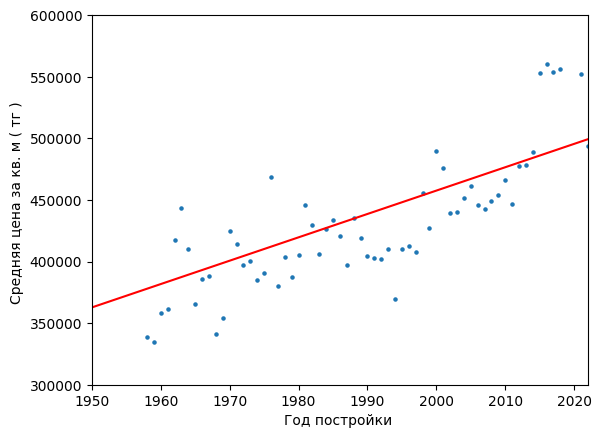

In [207]:
plt.scatter(X, Y, s=5)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Год постройки ')
plt.xlim(1950, 2022)
plt.ylabel('Средняя цена за кв. м ( тг ) ')
plt.ylim(300000, 600000)
plt.show()